<a href="https://colab.research.google.com/github/Abhinaya879/EXCLR/blob/main/AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

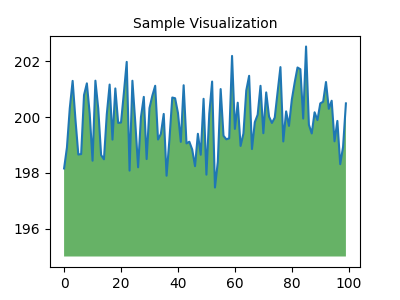

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Cars.csv')

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)  # None means no limit
pd.set_option('display.max_columns', None)  # None means no limit

# Display the entire DataFrame
print(df)

In [ ]:
file_name = list(uploaded.keys())[0]
Cars = pd.read_csv(file_name)
print(Cars)

     HP        MPG  VOL          SP         WT
0    49  53.700681   89  104.185353  28.762059
1    55  50.013401   92  105.461264  30.466833
2    55  50.013401   92  105.461264  30.193597
3    70  45.696322   92  113.461264  30.632114
4    53  50.504232   92  104.461264  29.889149
5    70  45.696322   89  113.185353  29.591768
6    55  50.013401   92  105.461264  30.308480
7    62  46.716554   50  102.598513  15.847758
8    62  46.716554   50  102.598513  16.359484
9    80  42.299078   94  115.645204  30.920154
10   73  44.652834   89  111.185353  29.363341
11   92  39.354094   50  117.598513  15.753535
12   92  39.354094   99  122.105055  32.813592
13   73  44.652834   89  111.185353  29.378436
14   66  45.734893   89  108.185353  29.347279
15   73  44.652834   89  111.185353  29.604527
16   78  42.789909   91  114.369293  29.535784
17   92  39.354094   50  117.598513  16.194122
18   78  42.789909   91  114.369293  29.929394
19   90  38.901834  103  118.472936  33.516974
20   92  38.4

In [ ]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
Cars.shape

(81, 5)

In [ ]:
Cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data=Cars).fit()

In [ ]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [ ]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [ ]:
ml_v=smf.ols('MPG~VOL',data = Cars).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rq_hp) # 16.33

rsq_wt = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rq_wt) # 16.33

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol = 1/(1-rq_vol) # 564.84

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp = 1/(1-rq_sp) # 16.35

d1 = {'Variables':['HP','WT','VOL','SP'],'VF'}




In [ ]:
car1=cars_new.drop{cars_new.index[[70,76]],axis=0}.reset_index()
car1=car1.drop(['index'],axis=1)

import statsmodels.formula.api as smf
final_ml_V= smf.ols('MPG~VOL+SP+HP',data=car1).fit()
(final_ml_V.rsquared,final_ml_V.aic)
final_ml_W=smf.ols('MPG~WT+SP+HP',data = car1).fit()
(final_ml_W.rsquared,final_ml_W.aic)
import statsmodels.formula.api as smf
final_ml_V= smf.ols{'MPG~VOL+SP+HP',data=car1}.fit()
{final_ml_V.rsquared,final_ml_Vaic}
final_ml_W=smf.ols('MPG~WT+SP+HP',data = car1).fit{}
{final_ml_W.rsquared,final_ml_W.aic}


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-6-b9646745ffdb>, line 1)

In [ ]:
]

In [ ]:
final_ml_V.predict(new_data)
final_ml_V.predict(cars_new.iloc[0.5,])
pred_V = final_ml_V.predict(cars_new)

NameError: name 'final_ml_V' is not defined

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cars.csv to Cars.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = df).fit()

PatsyError: Error evaluating factor: NameError: name 'sunday' is not defined
    sunday~daily
    ^^^^^^

In [ ]:
newdata=pd.Series([200,300])
data_pred=pd.DataFrame(newdata,columns=['daily'])
model.predict(data_pred)

,0
0,281.778581
1,415.750057


In [ ]:
model.rsquared,model.rsquared_adj

(0.9180596895873295, 0.9154990548869336)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Datasets/Toyota.csv")
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86.0,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86.0,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86.0,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86.0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.drop(["Model","Fuel_Type"],axis=1,inplace=True)

In [ ]:
df

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,90.0,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,90.0,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,90.0,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,2002,48000,90.0,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,2002,38500,90.0,0,Black,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,12,1998,20544,86.0,1,Blue,0,...,1,1,1,0,1,1,1,0,0,0
1432,1439,10845,72,9,1998,19000,86.0,0,Grey,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,8500,71,10,1998,17016,86.0,0,Blue,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,7250,70,11,1998,16916,86.0,1,Grey,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Mfg_Year+Central_Lock+Powered_Windows',data=df).fit()

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.796155465358528, 0.7957284167524356)

In [ ]:
price_hp = smf.ols('Price~Mfg_Year',data=df).fit().rsquared
vif_hp = 1/(1-price_mfg)
print(vif_hp)


NameError: name 'price_mfg' is not defined

In [ ]:
from sklearn.Cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'sklearn.Cluster'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
file_path = "/content/drive/MyDrive/Datasets/income.csv"
df = pd.read_csv(file_path)
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income')

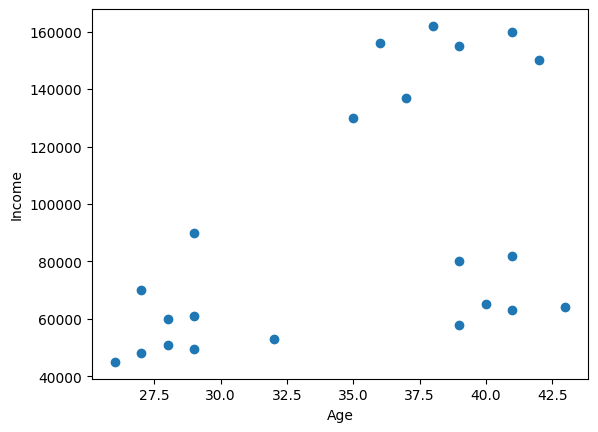

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

Text(0, 0.5, 'Income')

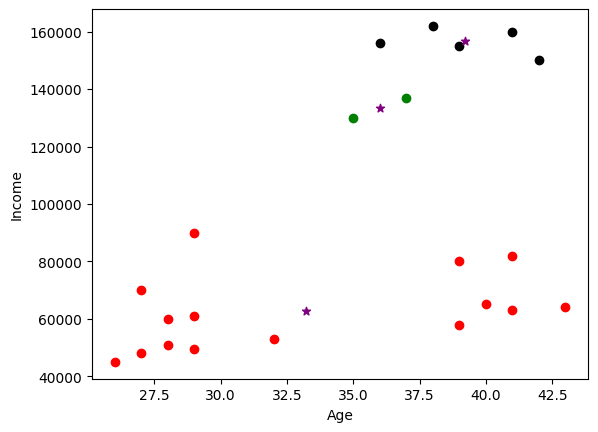

In [20]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')